# Importing and Setting Up Python Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams["figure.dpi"] = 150

In [2]:
import datetime
from datetime import datetime

In [3]:
# Used to execute multple code lines in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Used to display dataframes horizontally (instead of vertically)
# NOT USED! Instead I used the solution here:
# https://stackoverflow.com/a/50899244
#
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [5]:
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Importing Raw Data Files

In [6]:
ffx = pd.read_csv("ffxLighting_original_june28.txt")

In [7]:
ffx2 = pd.read_csv("ffxLighting_new_july1.txt")

In [81]:
gray = pd.read_csv("gray_file_july1.txt")

Initial Look At The Data

In [82]:
gray

,grayscale,timings
0,235.556693,2020-07-01 22:18:21.991453
1,235.544079,2020-07-01 22:18:22.187393
2,229.834134,2020-07-01 22:18:22.202118
3,229.882272,2020-07-01 22:18:22.219390
4,229.889206,2020-07-01 22:18:22.234170
...,...,...
399534,127.633434,2020-07-02 02:44:34.593307
399535,127.033685,2020-07-02 02:44:34.625037
399536,126.286911,2020-07-02 02:44:34.661103
399537,131.466966,2020-07-02 02:44:34.693662


In [83]:
gray["grayscale"][0]
gray[" timings"][0]

235.55669270833332

' 2020-07-01 22:18:21.991453'

In [84]:
gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399539 entries, 0 to 399538
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   grayscale  399539 non-null  float64
 1    timings   399539 non-null  object 
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


In [85]:
gray.describe()

,grayscale
count,399539.000000
mean,137.480845
std,24.593026
min,21.499414
25%,129.019624
50%,133.231758
75%,139.700376
max,253.803958


In [86]:
gray.columns

Index(['grayscale', ' timings'], dtype='object')

In [87]:
type(gray[" timings"][0])

str

# **Data Cleaning**

So, as usual, let's get rid of the stupid space in the timings columns.

In [88]:
gray.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
gray.columns

Index(['grayscale', 'timings'], dtype='object')

In [89]:
gray["timings"] = gray["timings"].apply(lambda string: string[1:])
gray["timings"][0]

'2020-07-01 22:18:21.991453'

Next, we convert the timings data into datetime format

In [1]:
gray["Datetime"] = pd.to_datetime(gray["timings"])

NameError: name 'pd' is not defined

# Feature Engineering

### **Creating a "Time Difference" Feature**

In [91]:
gray["deltaT"] = gray["Datetime"] - gray["Datetime"].shift(1)

In [92]:
# This takes a long time to run
gray["dT(seconds)"] = [gray["deltaT"][i].seconds + gray["deltaT"][i].microseconds * 10**(-6) for i in range(0,len(gray["deltaT"]))]

In [93]:
gray["dGray"] = gray["grayscale"] - gray["grayscale"].shift(1)

In [94]:
print(gray["Datetime"][4].time())

22:18:22.234170


In [95]:
gray["time"] = [gray["Datetime"][i].time() for i in range(0,len(gray["Datetime"]))]

In [146]:
gray.head(50)
gray["time"][1]
print(gray["time"][1])

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray,time
604,119.466702,2020-07-01 22:18:42.531267,2020-07-01 22:18:42.531267,00:00:00.043785,0.043785,17.057087,22:18:42.531267
605,119.484801,2020-07-01 22:18:42.571395,2020-07-01 22:18:42.571395,00:00:00.040128,0.040128,0.018099,22:18:42.571395
606,118.972699,2020-07-01 22:18:42.615302,2020-07-01 22:18:42.615302,00:00:00.043907,0.043907,-0.512103,22:18:42.615302
607,125.524329,2020-07-01 22:18:42.655502,2020-07-01 22:18:42.655502,00:00:00.040200,0.040200,6.551631,22:18:42.655502
608,125.633656,2020-07-01 22:18:42.695478,2020-07-01 22:18:42.695478,00:00:00.039976,0.039976,0.109326,22:18:42.695478
609,125.644131,2020-07-01 22:18:42.739352,2020-07-01 22:18:42.739352,00:00:00.043874,0.043874,0.010475,22:18:42.739352
610,129.318027,2020-07-01 22:18:42.779394,2020-07-01 22:18:42.779394,00:00:00.040042,0.040042,3.673896,22:18:42.779394
611,129.339551,2020-07-01 22:18:42.823343,2020-07-01 22:18:42.823343,00:00:00.043949,0.043949,0.021523,22:18:42.823343
612,129.485443,2020-07-01 22:18:42.863331,2020-07-01 22:18:42.863331,00:00:00.039988,0.039988,0.145892,22:18:42.863331
613,131.137204,2020-07-01 22:18:42.907281,2020-07-01 22:18:42.907281,00:00:00.043950,0.043950,1.651761,22:18:42.907281


KeyError: 1

# **Exploratory Data Analysis**

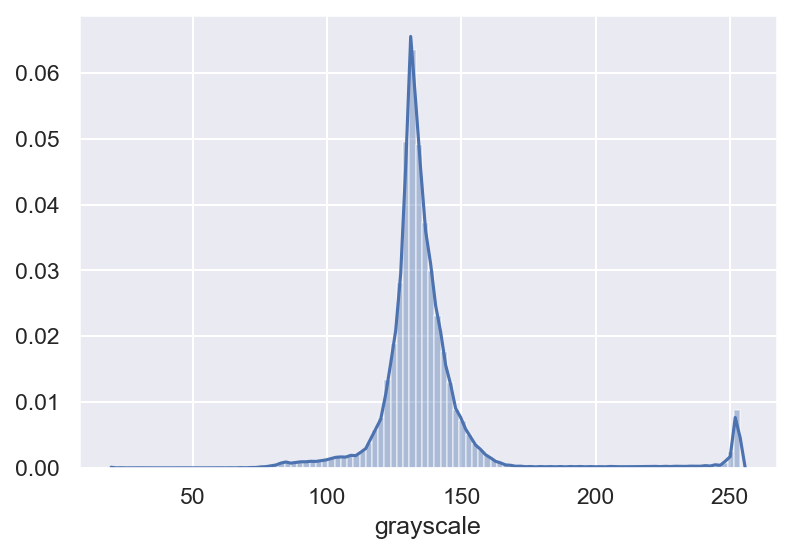

In [97]:
sns.distplot(gray['grayscale'], bins=100)

So, we see that most grayscale values are somewhere between 125-150, and there are a few that are around 250. The large grayscale values must be the bright lightning strikes. 

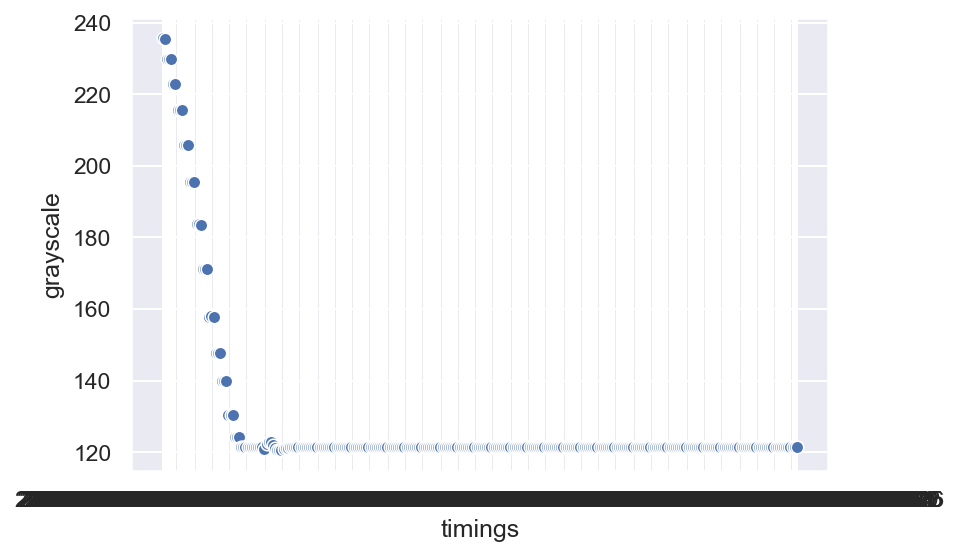

In [98]:
sns.scatterplot(x=gray["timings"][:300], y=gray["grayscale"][:300])

Looking at the above scatter plot, we can see that there are quite a few data points that seem to be clustered together! At least when the grayscale values are on a general decline, then there is some type of equilibrium.

We will try to see if we can investigate further into the groupings by using an interactive plot.

In [99]:
gray.head(300).iplot(kind='scatter',x="timings", y="grayscale")

Sooooo!!!!! We see that each grouping in the first scatter plot always consists of exactly three grayscale data points! (Except for the step at around 222, which is only two points)

So, perhaps a good idea is to group these triplets of datapoint into a single data point, whose grayscale value we we will define to the the average. This will GREATLY reduce the size of our dataframe, which would make it easier to analyze further.

BUT: Something that is really weird is that a lightning strike doesn't occur for more than 11 seconds after the first initial one...what's up with that?!

In [100]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray[:2000]

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray,time
0,235.556693,2020-07-01 22:18:21.991453,2020-07-01 22:18:21.991453,NaT,NaN,NaN,22:18:21.991453
1,235.544079,2020-07-01 22:18:22.187393,2020-07-01 22:18:22.187393,00:00:00.195940,0.195940,-0.012614,22:18:22.187393
2,229.834134,2020-07-01 22:18:22.202118,2020-07-01 22:18:22.202118,00:00:00.014725,0.014725,-5.709945,22:18:22.202118
3,229.882272,2020-07-01 22:18:22.219390,2020-07-01 22:18:22.219390,00:00:00.017272,0.017272,0.048138,22:18:22.219390
4,229.889206,2020-07-01 22:18:22.234170,2020-07-01 22:18:22.234170,00:00:00.014780,0.014780,0.006934,22:18:22.234170
5,222.903382,2020-07-01 22:18:22.255822,2020-07-01 22:18:22.255822,00:00:00.021652,0.021652,-6.985824,22:18:22.255822
6,222.920544,2020-07-01 22:18:22.273208,2020-07-01 22:18:22.273208,00:00:00.017386,0.017386,0.017161,22:18:22.273208
7,215.539964,2020-07-01 22:18:22.306986,2020-07-01 22:18:22.306986,00:00:00.033778,0.033778,-7.380579,22:18:22.306986
8,215.520316,2020-07-01 22:18:22.348545,2020-07-01 22:18:22.348545,00:00:00.041559,0.041559,-0.019648,22:18:22.348545
9,215.540713,2020-07-01 22:18:22.393396,2020-07-01 22:18:22.393396,00:00:00.044851,0.044851,0.020397,22:18:22.393396


OKAY!! So I know what the story is:

(1) I turn the program on right as a lightning strike occurs. This is why we see some grayscale values of ~250's at the head of the data.


(2) As the bright screen from the lightning started to die out, I went to the "start" menu.
    - index: 37 - 576
    - time: 18:23.48 - 18:41.4450
    - at around 130 grayscale
    - the grayscale of the start screen seems to therefore be [120,122)
        - it's pretty much ~121.45
    - I stay on the start screen for about ~18 seconds


(3) Then, I exited from the "start" menu, and went back to the game.
    - index: 578 - 603
    - time: 18:41.509266 - 18:42.487482
    - it takes a second to exit the "start" menu
        - The screen goes to black when you do this
        - Hence why the grayscale values are <<100 during this brief time
        
(4) Finally, the true data collection begins!
    - index: 604...
    - time: 18:42.531267

So, what we will do is drop all the data points with index 603 and below

In [101]:
gray.drop(labels=range(604), axis=0, inplace=True)

In [102]:
gray.head(20)

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray,time
604,119.466702,2020-07-01 22:18:42.531267,2020-07-01 22:18:42.531267,00:00:00.043785,0.043785,17.057087,22:18:42.531267
605,119.484801,2020-07-01 22:18:42.571395,2020-07-01 22:18:42.571395,00:00:00.040128,0.040128,0.018099,22:18:42.571395
606,118.972699,2020-07-01 22:18:42.615302,2020-07-01 22:18:42.615302,00:00:00.043907,0.043907,-0.512103,22:18:42.615302
607,125.524329,2020-07-01 22:18:42.655502,2020-07-01 22:18:42.655502,00:00:00.040200,0.040200,6.551631,22:18:42.655502
608,125.633656,2020-07-01 22:18:42.695478,2020-07-01 22:18:42.695478,00:00:00.039976,0.039976,0.109326,22:18:42.695478
609,125.644131,2020-07-01 22:18:42.739352,2020-07-01 22:18:42.739352,00:00:00.043874,0.043874,0.010475,22:18:42.739352
610,129.318027,2020-07-01 22:18:42.779394,2020-07-01 22:18:42.779394,00:00:00.040042,0.040042,3.673896,22:18:42.779394
611,129.339551,2020-07-01 22:18:42.823343,2020-07-01 22:18:42.823343,00:00:00.043949,0.043949,0.021523,22:18:42.823343
612,129.485443,2020-07-01 22:18:42.863331,2020-07-01 22:18:42.863331,00:00:00.039988,0.039988,0.145892,22:18:42.863331
613,131.137204,2020-07-01 22:18:42.907281,2020-07-01 22:18:42.907281,00:00:00.043950,0.043950,1.651761,22:18:42.907281


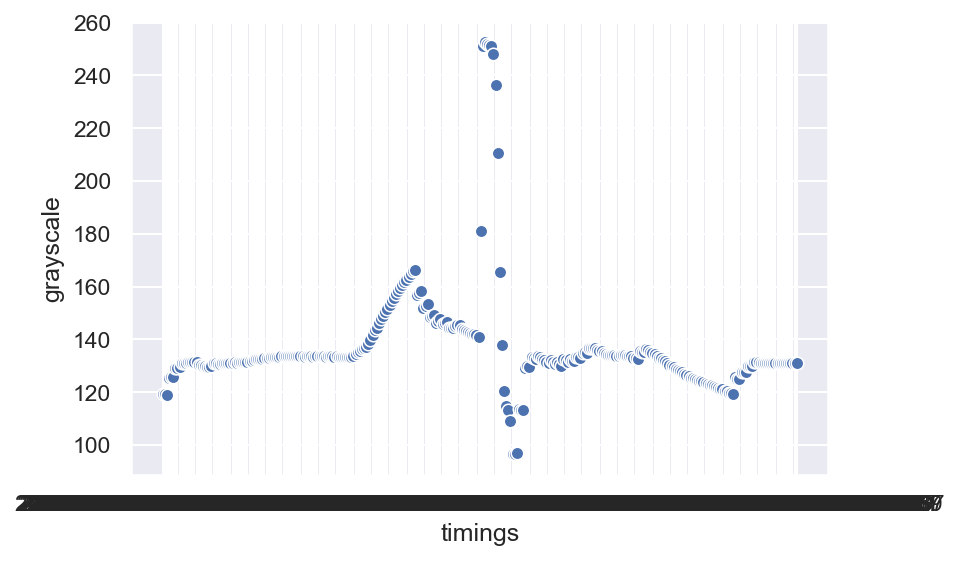

In [103]:
sns.scatterplot(x=gray["timings"][:300], y=gray["grayscale"][:300])

In [104]:
gray.head(500).iplot(kind='scatter',x="timings", y="grayscale")

Okay, now let's see if my original "group by three" idea would work

In [105]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray.loc[range(653,1500), gray.columns]

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray,time
653,132.870026,2020-07-01 22:18:44.571654,2020-07-01 22:18:44.571654,00:00:00.040159,0.040159,0.005404,22:18:44.571654
654,133.067067,2020-07-01 22:18:44.611715,2020-07-01 22:18:44.611715,00:00:00.040061,0.040061,0.197041,22:18:44.611715
655,133.144629,2020-07-01 22:18:44.655692,2020-07-01 22:18:44.655692,00:00:00.043977,0.043977,0.077562,22:18:44.655692
656,133.352152,2020-07-01 22:18:44.695759,2020-07-01 22:18:44.695759,00:00:00.040067,0.040067,0.207523,22:18:44.695759
657,133.305469,2020-07-01 22:18:44.739567,2020-07-01 22:18:44.739567,00:00:00.043808,0.043808,-0.046683,22:18:44.739567
658,133.475579,2020-07-01 22:18:44.779650,2020-07-01 22:18:44.779650,00:00:00.040083,0.040083,0.170111,22:18:44.779650
659,133.502624,2020-07-01 22:18:44.826004,2020-07-01 22:18:44.826004,00:00:00.046354,0.046354,0.027044,22:18:44.826004
660,133.668255,2020-07-01 22:18:44.865490,2020-07-01 22:18:44.865490,00:00:00.039486,0.039486,0.165632,22:18:44.865490
661,133.558949,2020-07-01 22:18:44.903749,2020-07-01 22:18:44.903749,00:00:00.038259,0.038259,-0.109307,22:18:44.903749
662,133.634521,2020-07-01 22:18:44.947551,2020-07-01 22:18:44.947551,00:00:00.043802,0.043802,0.075573,22:18:44.947551


To-Do:

1: Investigate the grayscale values for each lightning strike

2: Create a function to group the data (bins for milliseconds; group-by-threes; ...)

3: Connect grayscale data with the lightning count data (ffx2_cleaned)

4: Investigate the frequency of the fog?

In [106]:
test_gray = gray["grayscale"].loc[817:824]
test_gray
np.std(test_gray.values)

817    133.894349
818    133.773509
819    133.689141
820    134.019085
821    134.051504
822    133.995127
823    133.880902
824    133.737943
Name: grayscale, dtype: float64

0.12755724581113415

In [107]:
test_gray = gray["grayscale"].loc[700:705]
test_gray
np.std(test_gray.values)

700    137.246667
701    138.127607
702    139.873037
703    141.623659
704    143.431702
705    144.358776
Name: grayscale, dtype: float64

2.6106537938369874

In [108]:
test_gray = gray["grayscale"].loc[718:723]
test_gray
np.std(test_gray.values)

718    161.726868
719    162.663672
720    163.653757
721    164.757308
722    165.786589
723    166.462344
Name: grayscale, dtype: float64

1.6692012520713448

In [109]:
test_gray = gray["grayscale"].loc[748:753]
test_gray
np.std(test_gray.values)

748    142.682454
749    142.360407
750    142.042266
751    142.026878
752    141.703607
753    140.904453
Name: grayscale, dtype: float64

0.5587422353908948

In [110]:
test_gray = gray["grayscale"].loc[766:771]
test_gray
np.std(test_gray.values)

766    114.933867
767    113.371774
768    109.067500
769     96.656318
770     96.487272
771     97.048187
Name: grayscale, dtype: float64

8.058530636564887

In [111]:
test_gray = gray["grayscale"].loc[787:794]
test_gray
np.std(test_gray.values)

787    132.236367
788    131.427318
789    130.730615
790    131.520983
791    130.852194
792    129.989255
793    132.589277
794    132.206849
Name: grayscale, dtype: float64

0.8293887465863067

Based on the 6 testing group above, I've decided on groupings based on the milliseconds of time:

    - [0,250000) U [250000,500000) U [500000,750000) U [750000,1000000)

The decision criteria for whether or not to group a subset of data will be based on the threshold of 1 std:
    - If std of grayscale values is <= 1, then I will average the grayscale and times to create a single data point
    - Otherwise, if std>1, I will leave the data alone and move onto the next time grouping



In [112]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray.loc[range(604,1000), gray.columns]

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray,time
604,119.466702,2020-07-01 22:18:42.531267,2020-07-01 22:18:42.531267,00:00:00.043785,0.043785,17.057087,22:18:42.531267
605,119.484801,2020-07-01 22:18:42.571395,2020-07-01 22:18:42.571395,00:00:00.040128,0.040128,0.018099,22:18:42.571395
606,118.972699,2020-07-01 22:18:42.615302,2020-07-01 22:18:42.615302,00:00:00.043907,0.043907,-0.512103,22:18:42.615302
607,125.524329,2020-07-01 22:18:42.655502,2020-07-01 22:18:42.655502,00:00:00.040200,0.040200,6.551631,22:18:42.655502
608,125.633656,2020-07-01 22:18:42.695478,2020-07-01 22:18:42.695478,00:00:00.039976,0.039976,0.109326,22:18:42.695478
609,125.644131,2020-07-01 22:18:42.739352,2020-07-01 22:18:42.739352,00:00:00.043874,0.043874,0.010475,22:18:42.739352
610,129.318027,2020-07-01 22:18:42.779394,2020-07-01 22:18:42.779394,00:00:00.040042,0.040042,3.673896,22:18:42.779394
611,129.339551,2020-07-01 22:18:42.823343,2020-07-01 22:18:42.823343,00:00:00.043949,0.043949,0.021523,22:18:42.823343
612,129.485443,2020-07-01 22:18:42.863331,2020-07-01 22:18:42.863331,00:00:00.039988,0.039988,0.145892,22:18:42.863331
613,131.137204,2020-07-01 22:18:42.907281,2020-07-01 22:18:42.907281,00:00:00.043950,0.043950,1.651761,22:18:42.907281


In [113]:
test_grayscale = gray[["grayscale", "Datetime", "deltaT", "dT(seconds)"]]
test_grayscale.head(20)

,grayscale,Datetime,deltaT,dT(seconds)
604,119.466702,2020-07-01 22:18:42.531267,00:00:00.043785,0.043785
605,119.484801,2020-07-01 22:18:42.571395,00:00:00.040128,0.040128
606,118.972699,2020-07-01 22:18:42.615302,00:00:00.043907,0.043907
607,125.524329,2020-07-01 22:18:42.655502,00:00:00.040200,0.040200
608,125.633656,2020-07-01 22:18:42.695478,00:00:00.039976,0.039976
609,125.644131,2020-07-01 22:18:42.739352,00:00:00.043874,0.043874
610,129.318027,2020-07-01 22:18:42.779394,00:00:00.040042,0.040042
611,129.339551,2020-07-01 22:18:42.823343,00:00:00.043949,0.043949
612,129.485443,2020-07-01 22:18:42.863331,00:00:00.039988,0.039988
613,131.137204,2020-07-01 22:18:42.907281,00:00:00.043950,0.043950


In [114]:
test_grayscale["Datetime"][604]
pd.to_datetime(test_grayscale["Datetime"].values.astype(np.int64).mean())


# np.mean(test_grayscale["time"].loc[604:610].values)

Timestamp('2020-07-01 22:18:42.531267')

Timestamp('2020-07-02 00:31:33.083041024')

In [115]:
# Just some practice to see how to average date/time values

test_grayscale["grayscale"].loc[604:606].mean()
pd.to_datetime(test_grayscale["Datetime"].loc[604:606].mean())
pd.to_timedelta(test_grayscale["deltaT"].loc[604:606].mean())
test_grayscale["dT(seconds)"].loc[604:606].mean()

119.30806749131945

Timestamp('2020-07-01 22:18:42.572654592')

Timedelta('0 days 00:00:00.042606')

0.04260666666666666

In [116]:
test_grayscale["Datetime"][604].time()
test_grayscale["Datetime"][604].time().microsecond

datetime.time(22, 18, 42, 531267)

531267

In [117]:
test_grayscale["grayscale"].values[0]
test_grayscale["Datetime"]

119.46670247395834

604      2020-07-01 22:18:42.531267
605      2020-07-01 22:18:42.571395
606      2020-07-01 22:18:42.615302
607      2020-07-01 22:18:42.655502
608      2020-07-01 22:18:42.695478
                    ...            
399534   2020-07-02 02:44:34.593307
399535   2020-07-02 02:44:34.625037
399536   2020-07-02 02:44:34.661103
399537   2020-07-02 02:44:34.693662
399538   2020-07-02 02:44:34.729201
Name: Datetime, Length: 398935, dtype: datetime64[ns]

In [118]:
def grouping(grayvalues, datetimes):
    
    grayscale_values = []
    datetime_values = []
    n=2
    threshold = 750000
    new_list = []
    new_dict = {}
#     new_df = pd.DataFrame(data=None, columns=["new_gray_value", "new_datetime"])
    
    for i in range(len(grayvalues)): # -loop over all input values -> variable will be index 604 onwards
    
#         print(datetimes[i+604].time().microsecond)
#         print(threshold)
        if ( datetimes[i+604].time().microsecond < threshold and datetimes[i+604].time().microsecond > threshold-250000):
            grayscale_values.append(grayvalues.values[i])
            datetime_values.append(datetimes[i+604])
        
        else:
            
            if len(grayscale_values) > 0:
                gray_std = np.std(grayscale_values)
            else:
                gray_std=0
                
#             print("gray_std = ", gray_std)
#             print("The grayscale_values are:", grayscale_values)
#             print("The datetime_values are:", datetime_values)
            
            if gray_std <= 1:
                grayscale_mean = np.mean(grayscale_values)
                datetime_mean = pd.to_datetime(datetime_values).mean()
                new_dict.update({"new_gray_value": grayscale_mean})
                new_dict.update({"new_datetime": datetime_mean})
                new_list.append(new_dict)
            
            else:
                for j in range(len(grayscale_values)):
                    new_dict = {}
                    new_dict.update({"new_gray_value": grayscale_values[j]})
                    new_dict.update({"new_datetime": datetime_values[j]})
                    new_list.append(new_dict)   
            
            n = (n+1) % 4
            threshold = 250000 + 250000*n
            
            grayscale_values = []
            datetime_values = []
            new_dict = {}
            
            grayscale_values.append(grayvalues.values[i])
            datetime_values.append(datetimes[i+604])
                    
    new_dict.update({"new_gray_value": grayscale_values[0]})
    new_dict.update({"new_datetime": datetime_values[0]})
    new_list.append(new_dict) 
    
    
    
#     print("The new_list is:", new_list)
    
    new_df = pd.DataFrame(data=new_list)#, columns=["new_gray_value", "new_datetime"])
    
    return new_df 
    
    

In [119]:
x = test_grayscale["grayscale"]
y = test_grayscale["Datetime"]

len(x)
x
y
# my_list=[]
# for i in range(5):
#     my_list.append(y[i+604])
    
# pd.to_datetime(my_list).mean()

398935

604       119.466702
605       119.484801
606       118.972699
607       125.524329
608       125.633656
             ...    
399534    127.633434
399535    127.033685
399536    126.286911
399537    131.466966
399538    194.291855
Name: grayscale, Length: 398935, dtype: float64

604      2020-07-01 22:18:42.531267
605      2020-07-01 22:18:42.571395
606      2020-07-01 22:18:42.615302
607      2020-07-01 22:18:42.655502
608      2020-07-01 22:18:42.695478
                    ...            
399534   2020-07-02 02:44:34.593307
399535   2020-07-02 02:44:34.625037
399536   2020-07-02 02:44:34.661103
399537   2020-07-02 02:44:34.693662
399538   2020-07-02 02:44:34.729201
Name: Datetime, Length: 398935, dtype: datetime64[ns]

In [120]:
i=0
y[i+604].time().microsecond

x.values[i]
y[i+604]

531267

119.46670247395834

Timestamp('2020-07-01 22:18:42.531267')

In [121]:
# This takes very long to execute
boom = grouping(x, y)

In [122]:
boom[:100]

,new_gray_value,new_datetime
0,119.466702,2020-07-01 22:18:42.531267000
1,119.484801,2020-07-01 22:18:42.571395000
2,118.972699,2020-07-01 22:18:42.615302000
3,125.524329,2020-07-01 22:18:42.655502000
4,125.633656,2020-07-01 22:18:42.695478000
...,...,...
95,132.660775,2020-07-01 22:18:51.374767000
96,135.419486,2020-07-01 22:18:51.406993000
97,135.394235,2020-07-01 22:18:51.450401000
98,135.273324,2020-07-01 22:18:51.490398000


In [123]:
# # This takes up a lot of memory????
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
#     boom.loc[range(len(boom)), boom.columns]

In [124]:
boom[:100].iplot(kind='scatter',x="new_datetime", y="new_gray_value")

In [125]:
np.std(boom.loc[260:270]["new_gray_value"].values)

0.20781845852137978

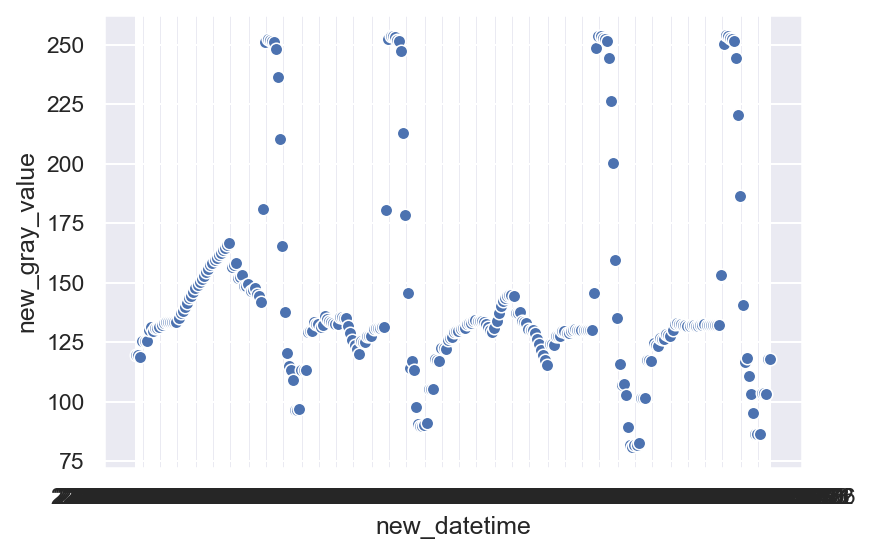

In [126]:
# This takes a while (b/c have to apply the anonymous function a lot)
sns.scatterplot(x=boom["new_datetime"][:300].apply(lambda x: x.strftime("%H:%M:%S.%f")), y=boom["new_gray_value"][:300])

In [127]:
boom["new_datetime"][:300].apply(lambda x: x.strftime("%H:%M:%S.%f"))

0      22:18:42.531267
1      22:18:42.571395
2      22:18:42.615302
3      22:18:42.655502
4      22:18:42.695478
            ...       
295    22:19:12.785271
296    22:19:12.817733
297    22:19:12.853791
298    22:19:12.883372
299    22:19:12.915426
Name: new_datetime, Length: 300, dtype: object

In [128]:
gray["Datetime"][1000].strftime("%H:%M:%S")

'22:18:58'

# Let's try investigating the lightning strikes themselves

In [129]:
boom.describe()

,new_gray_value
count,182992.000000
mean,140.979440
std,34.756455
min,57.492692
25%,125.987245
50%,133.095379
75%,143.471128
max,253.803958


In [130]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    boom.loc[range(1500), boom.columns]

,new_gray_value,new_datetime
0,119.466702,2020-07-01 22:18:42.531267000
1,119.484801,2020-07-01 22:18:42.571395000
2,118.972699,2020-07-01 22:18:42.615302000
3,125.524329,2020-07-01 22:18:42.655502000
4,125.633656,2020-07-01 22:18:42.695478000
5,125.644131,2020-07-01 22:18:42.739352000
6,130.287617,2020-07-01 22:18:42.884710656
7,131.240910,2020-07-01 22:18:43.134758144
8,129.913282,2020-07-01 22:18:43.384769536
9,130.948318,2020-07-01 22:18:43.634835712


Based on just a preliminary look at this grouped data, we see that a lightning strike is initiated by a grayscale value of around 150-180, then peaks at around 251-253, then is finished by around 165-180, then goes below 100, and then goes back to the usual 120's/130's.

There are times where the grayscale data is below 100 for a long time, whereas at other lightning strikes it's only below 100 for around 4 data points. Maybe this has to do with whether or not there was fog on the screen????

In [131]:
strike_data = boom[(boom['new_gray_value'] < 100) | (boom['new_gray_value'] > 160)]
strike_data.head()
strike_data.describe()

,new_gray_value,new_datetime
38,160.505531,2020-07-01 22:18:47.239876
39,161.726868,2020-07-01 22:18:47.279957
40,162.663672,2020-07-01 22:18:47.324004
41,163.653757,2020-07-01 22:18:47.363965
42,164.757308,2020-07-01 22:18:47.404046


,new_gray_value
count,27732.000000
mean,188.767643
std,67.419074
min,57.492692
25%,98.612889
50%,214.765081
75%,251.784810
max,253.803958


In [132]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    strike_data.reset_index().loc[range(1000), strike_data.columns]

,new_gray_value,new_datetime
0,160.505531,2020-07-01 22:18:47.239876000
1,161.726868,2020-07-01 22:18:47.279957000
2,162.663672,2020-07-01 22:18:47.324004000
3,163.653757,2020-07-01 22:18:47.363965000
4,164.757308,2020-07-01 22:18:47.404046000
5,165.786589,2020-07-01 22:18:47.447913000
6,166.462344,2020-07-01 22:18:47.488061000
7,181.030348,2020-07-01 22:18:48.780393000
8,251.190798,2020-07-01 22:18:48.823722000
9,252.445586,2020-07-01 22:18:48.864329000


Okay!! So I think I found a new pattern: When the lightning strike starts, the grayscale values go above 200 and it's always the second one above 200 that is a maximum, and then the grayscale values decrease from there to below 100.

But, when they are below 100, there doesn't seem to be any similar pattern.

Regardless, let's try to prove this pattern is the case for all our data.

In [133]:
# Function to check if my conjecture is correct

def max_gray(grayscale, gray_threshold):
    
    max_gray = 0
    max_index = 0
    gs_array = []
    off_count = 0
    total_count = 0
    
    for i in range(len(grayscale)):
        
        if grayscale.values[i] > gray_threshold:
            gs_array.append(grayscale.values[i])
            
        else:
            total_count += 1
            
            if not len(gs_array):
                continue
            
            max_gray = max(gs_array)
            max_index = gs_array.index(max_gray)
            
            if max_index != 1:
#                 print(f"Nope, your conjecture is false! Look at values before index {i}")
                
                off_count += 1
                
#                 return gs_array
            elif max_index == 1:
                gs_array = []
    
#     return "Your conjecture is true!"
    print(f"off_count = {off_count}")
    print(f"total_count = {total_count}")
    
    return f"The number of strikes that DONT agree with your conjecture are: {off_count / total_count}"


In [134]:
max_gray(strike_data["new_gray_value"], 200)

off_count = 12759
total_count = 12806


'The number of strikes that DONT agree with your conjecture are: 0.9963298453849758'

Well.....shit....lol. Okay okay, so looking at the data again, I think if I increase the bolt start grayscale to 220 instead of 200, then the pattern works.

In [135]:
max_gray(strike_data["new_gray_value"], 220)

off_count = 14186
total_count = 14280


'The number of strikes that DONT agree with your conjecture are: 0.9934173669467787'

Alright, well, let's see how many strikes don't follow my conjecture.

In [136]:
max_gray(strike_data["new_gray_value"], 220)

off_count = 14186
total_count = 14280


'The number of strikes that DONT agree with your conjecture are: 0.9934173669467787'

Okay, fine, I was wrong okay!

In any case, we can still isolate the lightning strikes; let's try creating a function to do that for us.

In [137]:
# Function to isolate the lightning strikes

def lightning(grayvalues2, datetimes2 = None):
    
    count = 1
    my_list = []
    list_of_gray = []
    my_dict = {}
    
    for i in range(len(grayvalues2)):
        
        if (grayvalues2.values[i] > 200):
            
            if not len(list_of_gray):
                list_of_gray.append(grayvalues2.values[i-1])
            
            list_of_gray.append(grayvalues2.values[i])
            
        else:
            
            if not len(list_of_gray):
                continue            
            
            list_of_gray.append(grayvalues2.values[i])
            
            my_dict.update({f"strike_{count}":list_of_gray})
            my_list.append(my_dict)
            
            list_of_gray = []
#             my_dict = {}
            count+=1
#     print(my_dict)                    
    new_df = pd.DataFrame(data={k:pd.Series(v) for k,v in my_dict.items()})#, columns=[])
    
    return new_df

In [138]:
strikes = lightning(strike_data["new_gray_value"])

In [139]:
strikes.describe()

,strike_1,strike_2,strike_3,strike_4,strike_5,strike_6,strike_7,strike_8,strike_9,strike_10,...,strike_1841,strike_1842,strike_1843,strike_1844,strike_1845,strike_1846,strike_1847,strike_1848,strike_1849,strike_1850
count,10.000000,10.000000,11.000000,10.000000,11.000000,10.000000,10.000000,10.000000,11.000000,9.000000,...,10.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000
mean,230.019501,233.485810,214.847160,224.863145,231.109662,234.759452,226.211116,229.185135,220.503957,233.721336,...,233.354275,220.502094,221.598706,234.316661,221.861454,231.844568,230.679768,225.687261,231.033025,226.221915
std,32.747786,31.103875,63.727783,54.391355,32.632712,29.042768,50.190548,32.887494,49.948589,27.480656,...,28.199354,49.953451,51.779214,30.891812,47.798860,33.702746,32.533439,52.970122,33.443931,53.995969
min,165.614180,178.216732,89.294115,82.710205,160.148122,182.922210,94.524958,160.606237,96.761501,187.182220,...,175.027493,98.686523,88.132780,177.849818,98.928877,169.075693,173.306761,86.573535,164.894173,83.663271
25%,216.953444,221.347685,213.337816,226.562821,227.017041,223.751569,219.205291,209.114277,206.136362,218.494401,...,220.060444,208.250031,218.616924,230.016694,215.886440,221.528346,215.370231,227.562266,226.362153,229.694128
50%,249.694053,251.782399,248.546722,251.013805,248.082184,251.833695,251.245257,248.627085,251.045570,250.631100,...,249.795474,249.066136,245.676357,251.820407,244.538623,250.836064,251.135052,251.060698,247.718709,251.077739
75%,251.514638,252.882197,252.385646,252.569498,252.267537,252.831635,253.073135,251.806527,252.836784,252.256631,...,252.577017,252.695736,252.442909,252.864856,251.705422,252.979214,252.066551,252.576397,252.221301,252.950951
max,252.445586,253.723672,253.779307,253.803958,253.769694,253.689912,253.526152,252.358096,253.600182,252.733470,...,253.412002,253.537956,253.615850,253.604007,253.284902,253.699102,253.451631,253.681979,253.211885,253.686530


In [140]:
strikes.transpose().describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1792.000000,1757.000000,1755.000000,1755.000000,1685.000000,535.000000,51.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000
mean,140.202880,237.593238,252.956550,251.731395,249.586621,250.417848,250.749404,244.857596,224.328018,192.777916,173.793070,186.113672,253.446022,252.811572,252.403618,251.845009,246.699676,230.929744,201.499617,153.988467
std,42.905759,16.152430,1.868858,6.423767,13.250680,10.559340,3.034551,6.323180,12.882844,17.590431,26.714910,26.096613,0.059317,0.236009,0.273986,0.105711,2.214585,7.443062,8.126828,37.737272
min,80.912298,200.044645,232.482581,202.897965,168.360785,163.086654,162.678154,204.119671,173.510062,85.005482,84.324339,163.103330,253.399544,252.600251,252.208324,251.726364,244.962266,222.996016,190.104079,98.022236
25%,93.289014,224.788989,252.954835,252.710712,251.999913,251.468966,250.471452,242.274634,216.024689,182.748688,168.788924,170.403455,253.404500,252.709762,252.267458,251.778067,245.813813,226.344762,195.249583,150.298286
50%,161.803338,245.020700,253.466554,253.249266,252.702523,252.114357,251.369469,246.927871,225.610049,193.063285,175.935270,179.207432,253.424691,252.743534,252.321934,251.838659,246.032590,230.389124,204.514212,168.682059
75%,176.987489,251.633491,253.616871,253.394352,253.015396,252.417227,251.759993,249.404250,234.166128,203.267337,186.220897,184.611270,253.463131,252.794325,252.357568,251.869775,246.239264,231.992010,207.913215,172.372240
max,199.934958,253.237441,253.803958,253.659069,253.400492,253.129199,252.578864,251.740853,249.474928,241.940094,243.822493,253.744170,253.553493,253.272357,252.950768,252.028353,251.121569,244.281257,208.657611,180.567513


In [141]:
strikes.head(50)

,strike_1,strike_2,strike_3,strike_4,strike_5,strike_6,strike_7,strike_8,strike_9,strike_10,...,strike_1841,strike_1842,strike_1843,strike_1844,strike_1845,strike_1846,strike_1847,strike_1848,strike_1849,strike_1850
0,181.030348,180.469450,91.020618,82.710205,160.148122,185.249691,94.524958,160.606237,96.761501,191.169284,...,196.801947,98.686523,88.132780,178.330417,98.928877,169.075693,173.306761,86.573535,164.894173,83.663271
1,251.190798,252.415986,248.546722,250.334382,237.544473,252.226100,211.855101,201.111732,209.748473,252.397142,...,252.774046,208.805231,236.496654,252.287158,220.887995,250.836064,252.077630,250.392311,245.366748,250.301631
2,252.445586,253.723672,253.779307,253.803958,253.769694,253.689912,253.325850,252.092669,253.364899,252.733470,...,253.412002,253.135622,253.615850,253.604007,253.284902,253.699102,253.451631,253.681979,253.211885,253.686530
3,252.003926,253.394674,253.436891,253.489554,253.407236,253.375638,253.526152,252.358096,253.600182,252.256631,...,252.683532,253.537956,253.382868,253.284740,253.049733,253.418307,253.122383,253.385199,252.731540,253.412181
4,251.619593,253.037601,252.621891,252.689056,252.477354,253.033480,253.172926,251.909766,253.277591,251.193512,...,252.257474,252.891240,252.664043,252.967702,251.912679,253.152279,252.033314,252.686104,252.332754,253.154606
5,251.199772,252.073880,252.149401,252.210824,252.057721,252.102005,252.773760,251.496810,252.395977,250.631100,...,251.766488,252.500231,252.221774,252.556318,251.498164,252.806149,251.596904,252.247279,251.886943,252.339984
6,248.197308,251.490918,251.638200,251.693229,251.633825,251.565384,251.760817,250.282643,251.903535,247.434261,...,247.824460,252.047018,251.726312,251.353656,251.015775,251.860169,250.673200,251.729085,250.070671,251.853848
7,236.433366,247.357409,244.155983,244.540081,248.082184,247.642018,250.729697,246.971527,251.045570,218.494401,...,236.372077,249.066136,245.676357,246.365811,244.538623,250.280947,235.539108,244.125599,242.988887,249.520908
8,210.460137,212.677777,226.369548,220.570400,237.338975,215.788086,241.255863,233.121914,233.693844,187.182220,...,214.623232,236.076615,230.646439,224.566989,231.711354,240.229697,208.647272,222.041156,220.819909,223.085202
9,165.614180,178.216732,200.306084,186.589762,216.695107,182.922210,199.186032,191.899954,202.524251,NaN,...,175.027493,207.694831,206.587409,177.849818,210.884886,202.826995,176.349476,190.010365,176.026742,191.200990


In [142]:
strikes.iloc[1].mean()

237.59323817602774

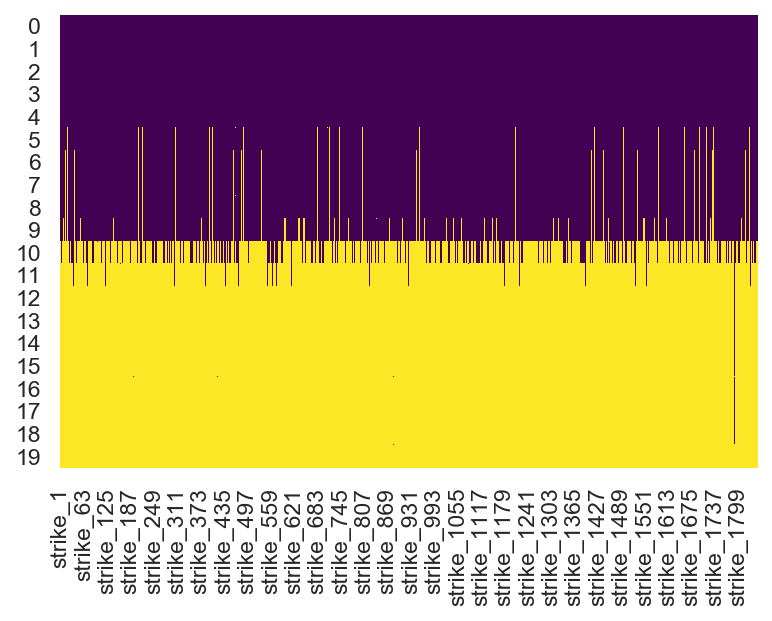

In [143]:
sns.heatmap(strikes.isnull(), yticklabels=True, cbar=False, cmap="viridis")

In the above heatmap, the yellow color represents a null value.

We can see that most lightning strikes admit around 9-10 grayscale values. There are about 20-30 strikes that have around 4-6 grayscale values.

We can actually compute these values exactly

In [144]:
strike_lengths = {f'length_{i}':strikes.iloc[i].nunique() for i in range(len(strikes.index))}

In [145]:
strike_lengths

{'length_0': 1850,
 'length_1': 1850,
 'length_2': 1843,
 'length_3': 1844,
 'length_4': 1846,
 'length_5': 1790,
 'length_6': 1756,
 'length_7': 1753,
 'length_8': 1755,
 'length_9': 1685,
 'length_10': 535,
 'length_11': 51,
 'length_12': 6,
 'length_13': 6,
 'length_14': 6,
 'length_15': 6,
 'length_16': 6,
 'length_17': 6,
 'length_18': 6,
 'length_19': 4}